# Well Plate

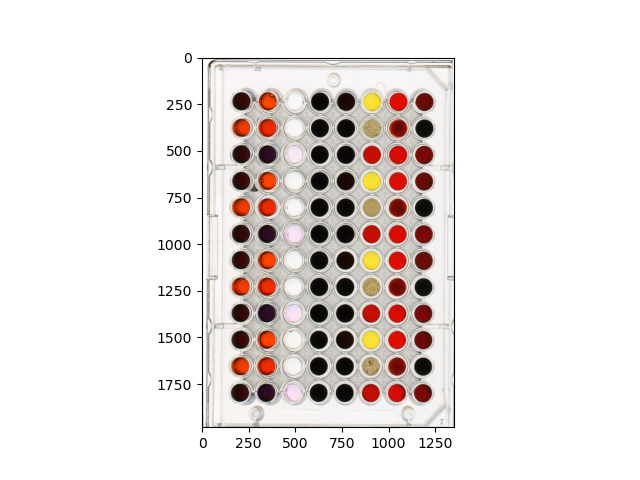

In [63]:
# read the image
%matplotlib widget

import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
from image_processing import file_finder_service

plant_seedling_path = file_finder_service.find_training_image('wellplate-02.tif')
well_plate = iio.imread(plant_seedling_path)
# display the image
fig, ax = plt.subplots()
ax.imshow(well_plate)

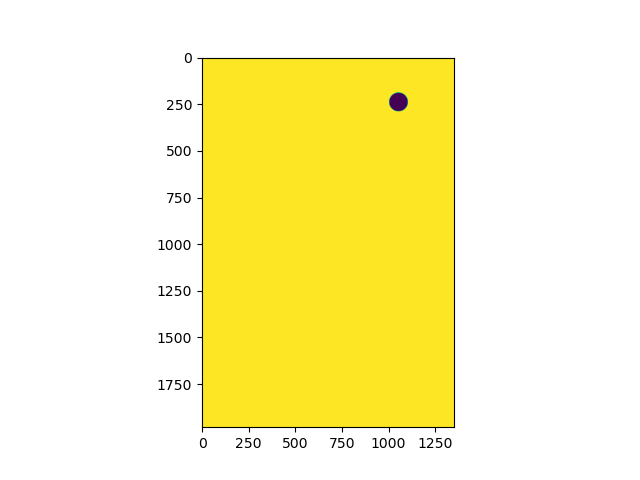

In [64]:
mask = np.ones(shape=well_plate.shape[:2], dtype="bool")
circle = ski.draw.disk(
    center=(240, 1053), radius=50, shape=well_plate.shape[:2]
)
mask[circle] = 0
fig, ax = plt.subplots()
ax.imshow(mask)


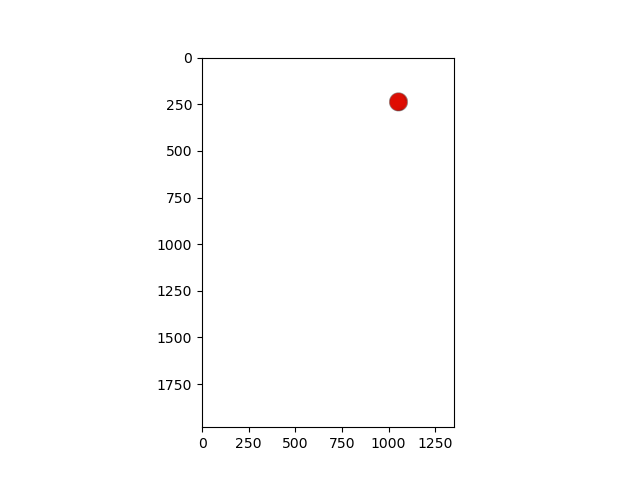

In [67]:
masked_img = np.array(well_plate)
masked_img[mask] = 0

fig, ax = plt.subplots()
ax.imshow(masked_img)

Text(0, 0.5, 'pixel count')

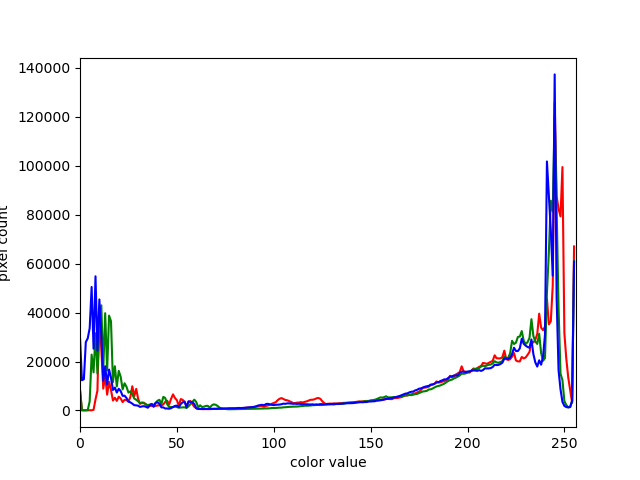

In [66]:

colors = ("red", "green", "blue")
fig, ax = plt.subplots()
ax.set_xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    # use your circular mask to apply the histogram
    # operation to the 7th well of the first row
    histogram, bin_edges = np.histogram(
        well_plate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )

    ax.plot(histogram, color=color)

ax.set_xlabel("color value")
ax.set_ylabel("pixel count")